## Libraries and Exploratory Analysis
Imported libraries and data for further analysis.

In [188]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filepath = "C:/Users/WALDMJN/OneDrive - Schaeffler/Uni/Data Exploration Project/Pred Maintenance Project/Predictive-Maintenance/Data/predictive_maintenance.csv"
df = pd.read_csv(filepath)
df.sample(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
821,822,L48001,L,296.7,307.6,1474,41.7,148,0,No Failure
3730,3731,M18590,M,302.3,311.2,1405,47.7,88,0,No Failure
8743,8744,H38157,H,297.4,308.7,1323,51.1,130,0,No Failure
7458,7459,M22318,M,300.1,311.6,1433,51.4,76,0,No Failure
1073,1074,L48253,L,297.0,307.8,1414,47.5,168,0,No Failure
165,166,L47345,L,298.5,308.4,1733,26.0,8,0,No Failure
5630,5631,M20490,M,302.8,312.2,1615,32.9,159,0,No Failure
5308,5309,L52488,L,304.0,313.2,1481,42.6,213,0,No Failure
783,784,H30197,H,296.7,307.9,1579,33.4,50,0,No Failure
9748,9749,M24608,M,298.9,310.1,1441,41.2,189,0,No Failure


In [189]:
df.apply(lambda x: x.nunique())

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

#### Additional Insights:

- UDI and Product ID are unique -> it can be removed.
- Target is integrated with Failure Type.
- 10 000 values, none missing.
- 6 different Failure Type's. No Failure (1) + Failure Varieties (5)

In [190]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

#### Descriptive Statistics:

- Air Temperature: Ranges from 295.3 K to 304.5 K, with a mean of 300.0 K.
- Process Temperature: Ranges from 305.7 K to 313.8 K, with a mean of 310.0 K.
- Rotational Speed: Ranges from 1168 to 2886 rpm, with a mean of 1538.8 rpm.
- Torque: Ranges from 3.8 to 76.6 Nm, with a mean of 40.0 Nm.
- Tool Wear: Ranges from 0 to 253 minutes, with a mean of 108 minutes.
- Target: Majority (96.6%) are labeled 0 (No Failure), and 3.4% are labeled 1 (Failure).

#### 1.1 ID Columns

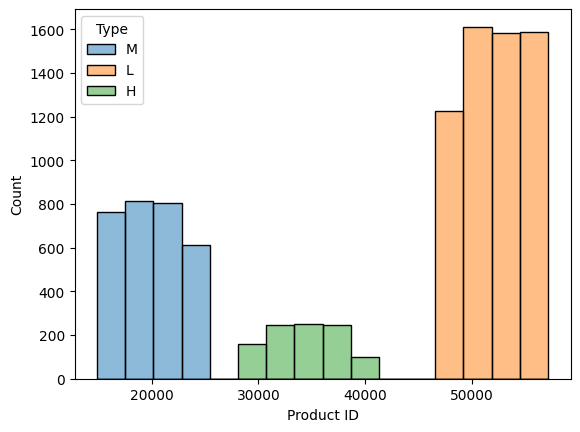

In [191]:
df['Product ID'] = df['Product ID'].apply(lambda x: x[1:])
df['Product ID'] = pd.to_numeric(df['Product ID'])

# Histogram of ProductID
sns.histplot(data=df, x='Product ID', hue='Type')
plt.show()

UDI appears to be an index number, while Product ID serves as an identification number. Therefore, it can be omitted.

In [192]:
df = df.drop(["UDI", "Product ID"], axis = 1)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


Check for missing values:

In [193]:
df.isna().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

#### 1.2 Target anomalies

Incosistencies between "Target" and "Failure Type":

In [194]:
fail_df = df[df['Target'] == 1]
fail_df['Failure Type'].value_counts()

Failure Type
Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
No Failure                    9
Name: count, dtype: int64

In [195]:
fail_df[fail_df['Failure Type'] == 'No Failure']

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1437,H,298.8,309.9,1439,45.2,40,1,No Failure
2749,M,299.7,309.2,1685,28.9,179,1,No Failure
4044,M,301.9,310.9,1419,47.7,20,1,No Failure
4684,M,303.6,311.8,1421,44.8,101,1,No Failure
5536,M,302.3,311.8,1363,54.0,119,1,No Failure
5941,L,300.6,310.7,1438,48.5,78,1,No Failure
6478,L,300.5,309.8,1663,29.1,145,1,No Failure
8506,L,298.4,309.6,1710,27.3,163,1,No Failure
9015,L,297.2,308.1,1431,49.7,210,1,No Failure


9 Datasets have been registered as "1" in Column Target even if the Failure Type is "No Failure". The 9 entries can be deleted before they interfere with data determination.

In [196]:
indexPossibleFailure = fail_df[fail_df['Failure Type'] == 'No Failure'].index
df.drop(indexPossibleFailure, axis=0, inplace=True)

In [197]:
df.shape[0]

9991

In [198]:
fail_df  = df[df['Target'] == 0]
fail_df ['Failure Type'].value_counts()

Failure Type
No Failure         9643
Random Failures      18
Name: count, dtype: int64

In [199]:
fail_df [fail_df ['Failure Type'] == 'Random Failures']

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1221,M,297.0,308.3,1399,46.4,132,0,Random Failures
1302,L,298.6,309.8,1505,45.7,144,0,Random Failures
1748,H,298.4,307.7,1626,31.1,166,0,Random Failures
2072,L,299.6,309.5,1570,35.5,189,0,Random Failures
2559,L,299.3,309.0,1447,50.4,140,0,Random Failures
3065,M,300.1,309.2,1687,27.7,95,0,Random Failures
3452,H,301.6,310.5,1602,32.3,2,0,Random Failures
5471,L,302.7,312.3,1346,61.2,170,0,Random Failures
5489,L,302.6,312.1,1499,35.0,215,0,Random Failures
5495,H,302.9,312.5,1357,55.0,12,0,Random Failures


Same for the other direction. 18 Datasets have some "random failures" even if they're target is "0". 

In [200]:
indexPossibleFailure = fail_df[fail_df['Failure Type'] == 'Random Failures'].index
df.drop(indexPossibleFailure, axis=0, inplace=True)
df.shape[0]

9973

27 instaces were removed (0.27% of the entire dataset). Of which:

- 9 belonged to class Failure in 'Target' variable and No failure in target 'Failure Type'
- 18 belonged to class No failure in 'Target' variable and Random failures in target 'Failure Type'

#### 1.3 Outliers inspection

In [201]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000
mean,300.003259,310.004031,1538.893212,39.978993,107.921087,0.033089
std,2.000548,1.483692,179.412171,9.966805,63.649152,0.178879
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.700000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


We can guess the presence of outliers in Rotational Speed and Torque because the maximum is very different from the third quartile. To make this consideration more concrete we take a closer look at the situation with boxplots, using histograms to understand the distribution.

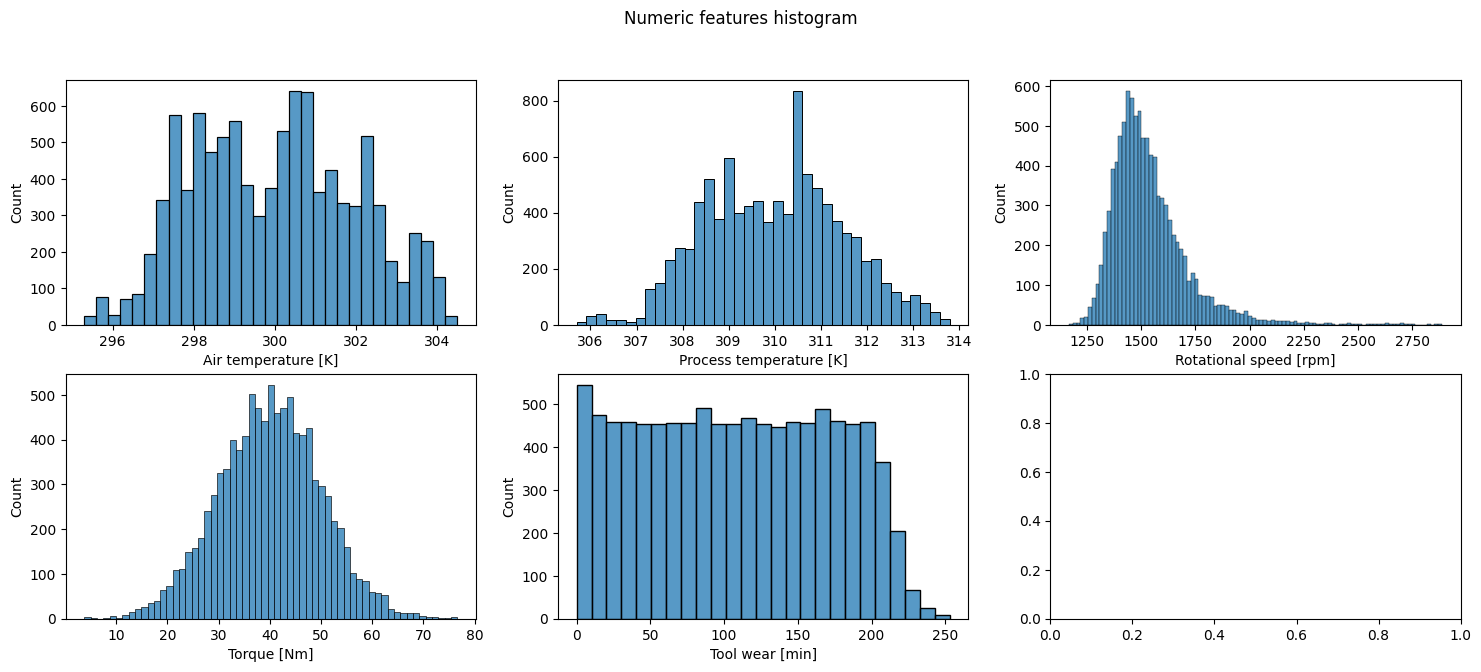

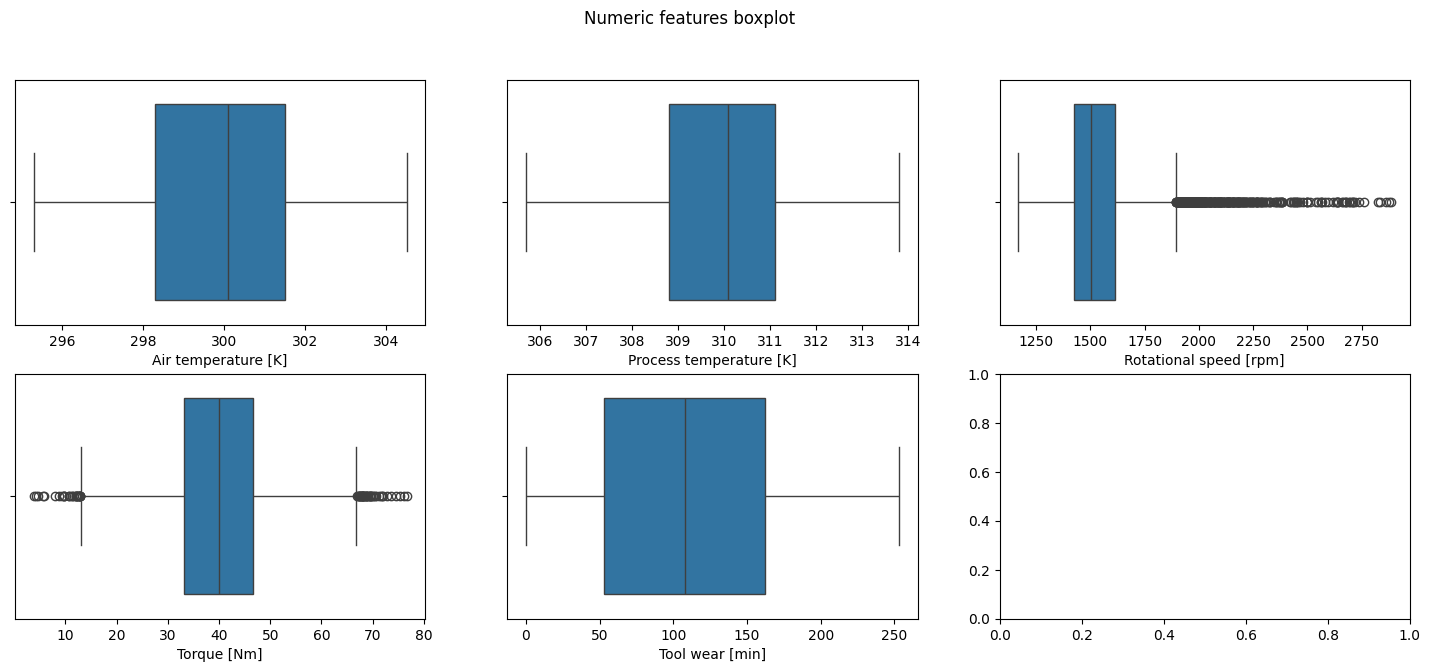

In [202]:
df['Tool wear [min]'] = df['Tool wear [min]'].astype('float64')
df['Rotational speed [rpm]'] = df['Rotational speed [rpm]'].astype('float64')

features = [col for col in df.columns
            if df[col].dtype=='float64' or col =='Type']

num_features = [feature for feature in features  if df[feature].dtype=='float64']


fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18,7))
fig.suptitle('Numeric features histogram')
for j, feature in enumerate(num_features):
    sns.histplot(ax=axs[j//3, j-3*(j//3)], data=df, x=feature)
plt.show()


fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18,7))
fig.suptitle('Numeric features boxplot')
for j, feature in enumerate(num_features):
    sns.boxplot(ax=axs[j//3, j-3*(j//3)], data=df, x=feature)
plt.show()

The boxplots highlight possible outliers in the features mentioned above. However, in the case of Torque, these outliers are likely due to the method of detection using boxplots. For Rotational Speed, the Gaussian distribution is skewed, and it is not unrealistic to think that the few observations with high Rotational Speed are likely to fail. 

#### 1.4 Feature Engineering

We include another features such that Power [W], Overstrain [minNm], Heat dissipation [rpminK] with following formulas:

- Power W = Nm * ((2 * pi * rpm)/60)
- Overstrain minNm = Nm * min
- Heat dissipation rpminK = abs(Air Temperature (K) - Process Temperature (K) * rpm)

In [203]:
df['Power [W]'] = df['Torque [Nm]'] * (2 * np.pi * df['Rotational speed [rpm]'] / 60.0)
df['Overstrain [minNm]'] = df['Torque [Nm]'] * df['Tool wear [min]']
df['Heat dissipation [rpminK]'] = abs(df['Air temperature [K]'] - df['Process temperature [K]']) * df['Rotational speed [rpm]']

df.head(5)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Power [W],Overstrain [minNm],Heat dissipation [rpminK]
0,M,298.1,308.6,1551.0,42.8,0.0,0,No Failure,6951.590560,0.0,16285.5
1,L,298.2,308.7,1408.0,46.3,3.0,0,No Failure,6826.722724,138.9,14784.0
2,L,298.1,308.5,1498.0,49.4,5.0,0,No Failure,7749.387543,247.0,15579.2
3,L,298.2,308.6,1433.0,39.5,7.0,0,No Failure,5927.504659,276.5,14903.2
4,L,298.2,308.7,1408.0,40.0,9.0,0,No Failure,5897.816608,360.0,14784.0


In [204]:
df[['Power [W]', 'Overstrain [minNm]', 'Heat dissipation [rpminK]']].describe()

,Power [W],Overstrain [minNm],Heat dissipation [rpminK]
count,9973.000000,9973.000000,9973.000000
mean,6278.869703,4312.957365,15387.123122
std,1067.021375,2826.169378,2344.895227
min,1148.440610,0.000000,9851.400000
25%,5561.770914,1963.700000,13740.200000
50%,6269.173804,4006.800000,15150.000000
75%,7001.458108,6276.400000,16716.600000
max,10469.923005,16497.000000,32476.200000


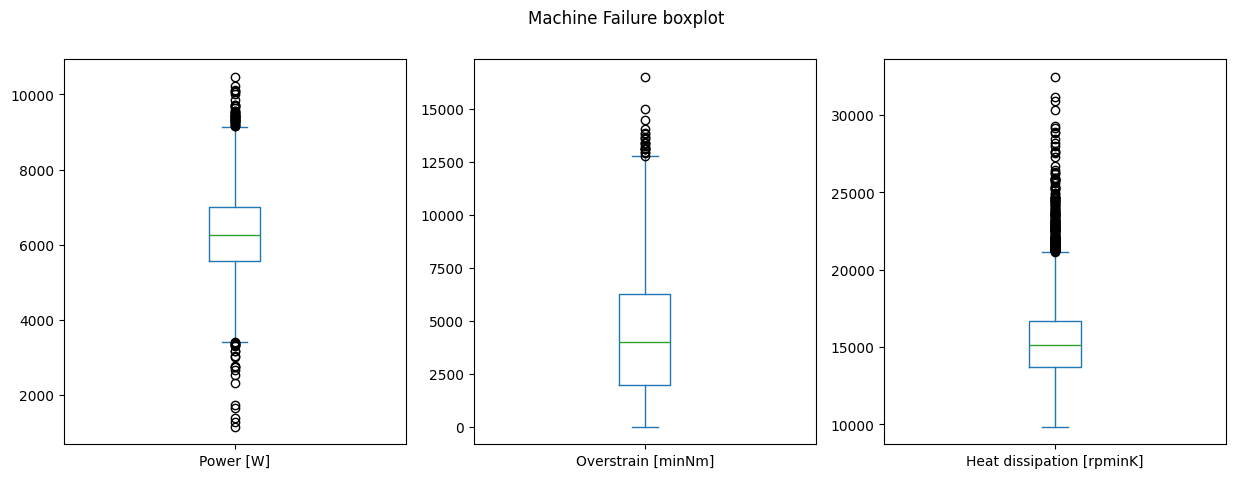

In [205]:
df[['Power [W]', 'Overstrain [minNm]', 'Heat dissipation [rpminK]']].plot.box(subplots=True,
                                                                                      figsize=(15,5))
plt.suptitle('Machine Failure boxplot')
plt.show()

- Machine fails if 3500 W < power < 9000 W (the outlier values gets a power failure).
- Machine fails if oversstrain > 11,000 minNm (the outlier values gets a overstrain failure).
- Machine fails if Heat dissipation < 11,868 rpmK (intlier values get heat dissipation failure).

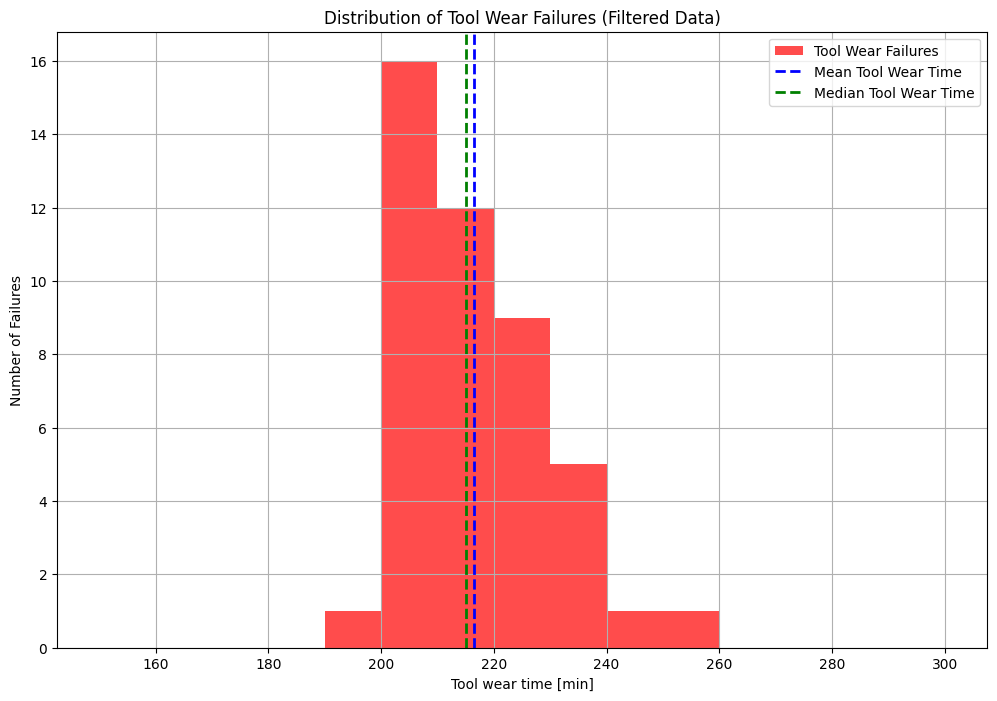

Interval with the most failures: [200, 210)
Number of failures in the most frequent interval: 16
Total number of tool wear failures: 45


In [210]:
filtered_df = df[(df['Tool wear [min]'] >= 150) & (df['Tool wear [min]'] <= 300)]

failure_count = filtered_df[filtered_df['Failure Type'] == 'Tool Wear Failure'].groupby(
    pd.cut(filtered_df['Tool wear [min]'], bins=np.arange(150, 310, 10), right=False), observed=True).size()

most_failures_interval = failure_count.idxmax()
most_failures_count = failure_count.max()
total_failures_count = filtered_df[filtered_df['Failure Type'] == 'Tool Wear Failure'].shape[0]


plt.figure(figsize=(12, 8))
plt.hist(filtered_df[filtered_df['Failure Type'] == 'Tool Wear Failure']['Tool wear [min]'], bins=np.arange(150, 310, 10), color='red', alpha=0.7, label='Tool Wear Failures')
plt.axvline(filtered_df[filtered_df['Failure Type'] == 'Tool Wear Failure']['Tool wear [min]'].mean(), color='blue', linestyle='dashed', linewidth=2, label='Mean Tool Wear Time')
plt.axvline(filtered_df[filtered_df['Failure Type'] == 'Tool Wear Failure']['Tool wear [min]'].median(), color='green', linestyle='dashed', linewidth=2, label='Median Tool Wear Time')
plt.xlabel('Tool wear time [min]')
plt.ylabel('Number of Failures')
plt.title('Distribution of Tool Wear Failures (Filtered Data)')
plt.legend()
plt.grid(True)
plt.show()

print("Interval with the most failures:", most_failures_interval)
print("Number of failures in the most frequent interval:", most_failures_count)
print("Total number of tool wear failures:", total_failures_count)


- Machine fails if the tool wear [min]: 190 min < tool wear [min] < 260 min (the inlier values gets a tool wear failure).

#### 1.5 Relation plotting

## Correlation Analysis

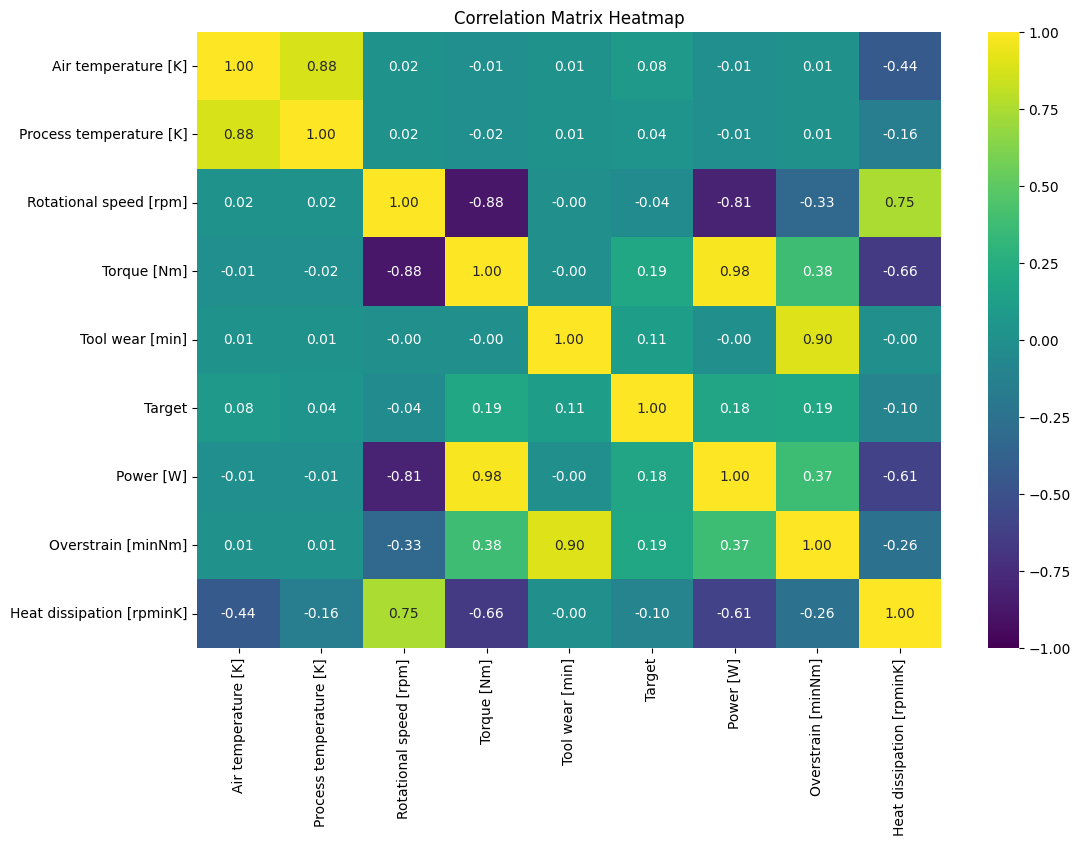

In [207]:
numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

There is a strong correlation between process temperature and air temperature, as well as between rotational speed and torque.